# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [1]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [2]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [3]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as stats
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from collections import Counter
# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

df_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    df_list.append(df)


df = pd.concat(df_list, axis=0, ignore_index=True)


df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555914.000,1571207.000,1555914.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555914.000
mean,1.673,1.503,2.952,1.055,164.377,162.263,1.253,12.613,1.106,0.492,2.192,0.330,0.298,18.555,2.296
std,0.470,1.144,70.082,0.715,65.722,70.048,0.486,12.480,1.256,0.074,2.709,1.578,0.035,14.931,0.707
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-1238.000,-17.690,-0.500,-40.000,-25.000,-0.300,-1242.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,70137.720,99.000,265.000,265.000,4.000,4265.000,87.560,18.490,500.000,198.000,0.300,4268.300,2.750


In [5]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1555914 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1555914 non-null  float64       
 6   store_and_fwd_flag     1555914 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [6]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555914.000,1571207.000,1555914.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555914.000
mean,1.673,1.503,2.952,1.055,164.377,162.263,1.253,12.613,1.106,0.492,2.192,0.330,0.298,18.555,2.296
std,0.470,1.144,70.082,0.715,65.722,70.048,0.486,12.480,1.256,0.074,2.709,1.578,0.035,14.931,0.707
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-1238.000,-17.690,-0.500,-40.000,-25.000,-0.300,-1242.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,70137.720,99.000,265.000,265.000,4.000,4265.000,87.560,18.490,500.000,198.000,0.300,4268.300,2.750


### Descripción de Columnas del Dataset.


In [7]:
# Listado de tipos de variables presentes en el dataset
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [8]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

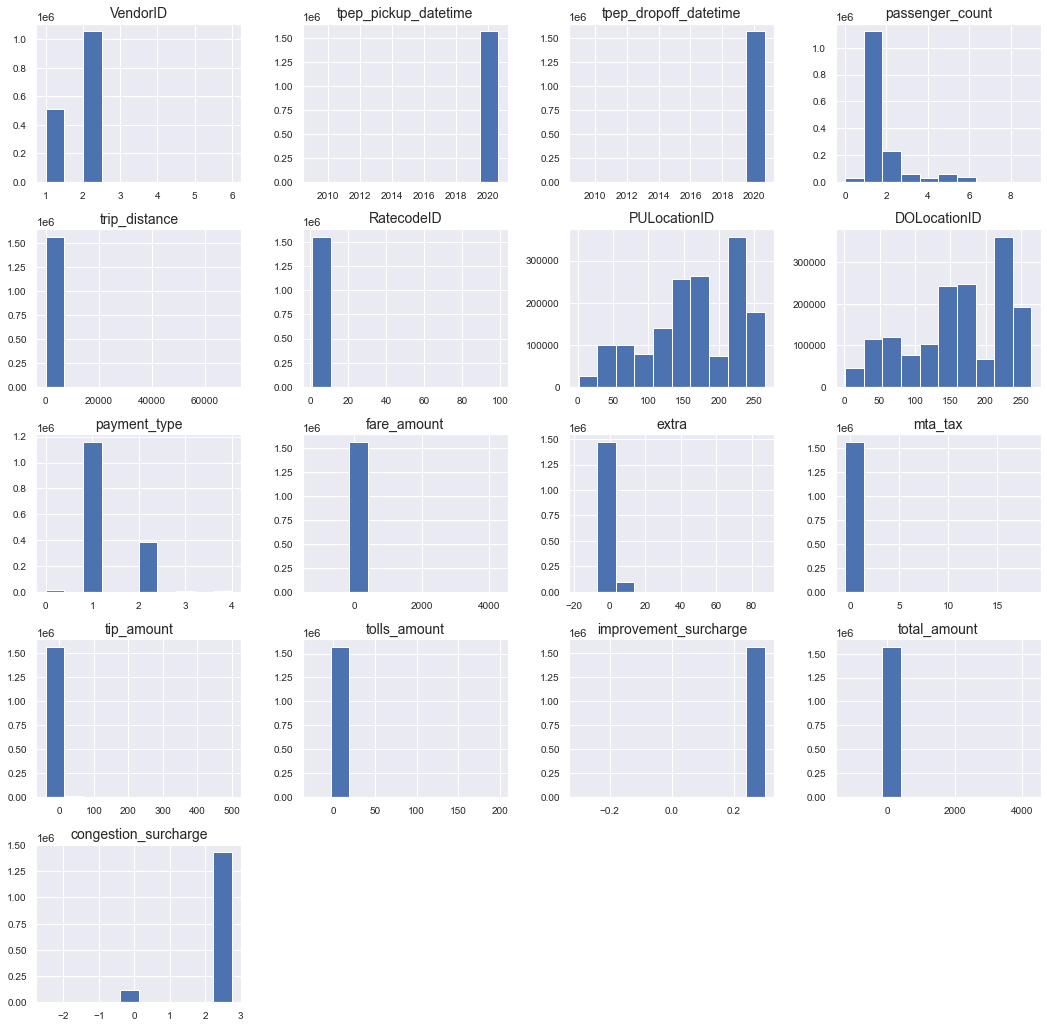

In [9]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [10]:
print_categorical(df.VendorID)

Ordinalidad: [2 1 6 5]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          2
6         66
1     513904
2    1057235
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [11]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [12]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [13]:
print_null_info(df.passenger_count)

Cantidad de nulos: 15293/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [14]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [15]:
print_categorical(df.PULocationID)

Ordinalidad: [ 43 246 158 140 142 151 170  50 125 229 234 107 132 148 236  90 163 249
 216 161 186 239 146  66 162  68  48 164 237 137 143 113 174 230 100  79
 138 238 263   7 232  75 224 129 145 114 141  13 131  23 262 264 260 231
  42 193  37 116 139 261  74 233 166 212  87 211 226  88  97 144 108 244
 209 255  41  89  93   4 168  28  25 202 112  45 191 265  76  52 181  12
  24 152  33 242 228 188 106 197  82  70  65  17 223  10  83 218  61  32
 256 119 225  56  20 185  95 102  77  26 220  92  14  63 179  81  39  85
  21 250 175 198 205 222 203 241 215   9  72 165 243 130  49   1 167 133
  40 136 153  29 219  80  34 159 258 157  69  35 182 177 254  38 208 171
 169 117 227  62 160 135  55 147  22 127 248  36  71 257 196  91  51 195
 189 207 259 217 192 184  47 122  11   8 213 123 149 194 134   3  18 235
  78 178 101  86 155 190 247 210 201 183  98 187 150 252 173 128  67 200
 121  53 214  54  73 180 126 109  94  15  44  16 240 118 105 206  60  59
 124  19  27  64  96 115   6 253 120  


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [16]:
print_categorical(df.DOLocationID)

Ordinalidad: [151 163  68 263 236  74 234 220  82 138 113 107  93 181 186 239  88 237
   4  95 142 162 170 129  33  75 137 143 229 231 211 140  48 249 195 114
 238 148  69 132 100 164  17  41  90 131 168 262  50   7  10 230   1  79
  43  80 265 146 233 161 232 224 141 216 219 115 127  87 260 246 244 213
 193 261  83 166 198 169 205 158 145  24 136 225 264 196  52  25  42  89
  66 185 119  37  13 258 144 209  65 255 247  40 116 256 125 243  97  14
  73 223 165 177 248 112 227  45 257  72 210 155  56  39  26  11 152  54
  49 215 212 200 202 182 228  91  61 217 252 226 189 101 179  20 123  94
 130 128  16 173  36 221  76 106 254  71   9 242 126 159 133  81  28 194
 250 134 188  62  12 235  18  19  92  47 197 175 124  67 160 139 108 135
  70  86 157 259 241 191 180 167  85 176  77  78  29 218 203  53 251  58
 222  35  38  51  64 190  55 117 122  15 178 154  46  22  23 192 174 121
  98 245 102 208   3  21  57 149 184 147 207 206  63  96  60  32  34  27
 240 171 214 201 183 150   6 187 172 1


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [17]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1.  2.  5. nan  3.  4. 99.  6.]
Cantidad de nulos: 15293/1571207
Ocurrencias:
6.000          12
99.000         63
4.000        1151
3.000        3210
5.000        8470
2.000       35634
1.000     1507374
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [18]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' 'Y' None]
Cantidad de nulos: 15293/1571207
Ocurrencias:
Y      15885
N    1540029
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [19]:
print_categorical(df.payment_type)

Ordinalidad: [1 2 4 0 3]
Cantidad de nulos: 0/1571207
Ocurrencias:
4       4570
3       8256
0      15293
2     382152
1    1160936
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [20]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [21]:
print_null_info(df.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [22]:
print_null_info(df.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [23]:
print_null_info(df.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [24]:
print_null_info(df.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [25]:
print_null_info(df.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [26]:
print_null_info(df.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [27]:
print_null_info(df.congestion_surcharge)

Cantidad de nulos: 15293/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [28]:
print_null_info(df.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [29]:
# verificamos cantidad de items repetidos y los eliminamos
df = df.drop_duplicates()
df.describe() #TODO: Agrego describe para que se noten las cantidades eliminadas

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571088.000,1555914.000,1571088.000,1555914.000,1571088.000,1571088.000,1571088.000,1571088.000,1571088.000,1571088.000,1571088.000,1571088.000,1571088.000,1571088.000,1555914.000
mean,1.673,1.503,2.952,1.055,164.379,162.265,1.253,12.612,1.106,0.492,2.192,0.330,0.298,18.554,2.296
std,0.470,1.144,70.085,0.715,65.721,70.047,0.486,12.479,1.256,0.074,2.709,1.578,0.035,14.930,0.707
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-1238.000,-17.690,-0.500,-40.000,-25.000,-0.300,-1242.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,70137.720,99.000,265.000,265.000,4.000,4265.000,87.560,18.490,500.000,198.000,0.300,4268.300,2.750


In [30]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(df.columns)):
  col_name = df.columns[i]
  col_data = df[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571088
tpep_pickup_datetime: 0/1571088
tpep_dropoff_datetime: 0/1571088
passenger_count: 15174/1571088
trip_distance: 0/1571088
RatecodeID: 15174/1571088
store_and_fwd_flag: 15174/1571088
PULocationID: 0/1571088
DOLocationID: 0/1571088
payment_type: 0/1571088
fare_amount: 0/1571088
extra: 0/1571088
mta_tax: 0/1571088
tip_amount: 0/1571088
tolls_amount: 0/1571088
improvement_surcharge: 0/1571088
total_amount: 0/1571088
congestion_surcharge: 15174/1571088
airport_fee: 1571088/1571088


#### 2.1.1 Análisis de faltantes

Las categorías con faltantes son las siguientes:

* passenger_count: 15180/1571072
* RatecodeID: 15180/1571072
* store_and_fwd_flag: 15180/1571072
* congestion_surcharge: 15180/1571072
* airport_fee: 1571072/1571072

Para cada una de estas columnas se decide:
* __passenger_count__ es ingresado a mano por lo que los datos faltantes suponemos que corresponden a fallas en la carga por parte del conductor. Se decide eliminar los faltantes dado que representan el 1%
* __RatecodeID__ no aporta información por lo que se elimina esta feature
* __store_and_fwd_flag__ no aporta información por lo que se elimina esta feature
* __congestion_surcharge__ : los faltantes representan el 1% por lo que se quitan
* __airport_fee__ se quita ya que todos los valores son nulos


In [31]:
# descarto datos nulos de los features con interés (passenger count y congestion_surcharge)
df = df.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(df['passenger_count'])

1555914

#### 2.1.2 Datos no nulos inválidos

En algunos features se detectan valores fuera del rango esperado (tal como valores negativos o fuera del rango de las categorías definidas)

In [32]:
# verificamos cantidad de negativos en las categorías numéricas
cols_to_check = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for i, col in enumerate(cols_to_check):
  col_data = df[col]
  print(f'{col}: {col_data[col_data < 0].count()}/{col_data.size}')
  

trip_distance: 1/1555914
fare_amount: 5006/1555914
extra: 2405/1555914
mta_tax: 4884/1555914
tip_amount: 44/1555914
tolls_amount: 97/1555914
improvement_surcharge: 5004/1555914
total_amount: 5004/1555914
congestion_surcharge: 3947/1555914


In [33]:
# Funcion para realizar subplots de variables

def plotVariables(dataframe, varArray):
    fig = plt.figure(figsize=(30,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for j,colName in enumerate(varArray):
        plt.subplot(3,3,j+1)
        plt.plot(dataframe[colName])
        plt.title(colName)
        

#### Exploración gráfica de variables con datos negativos

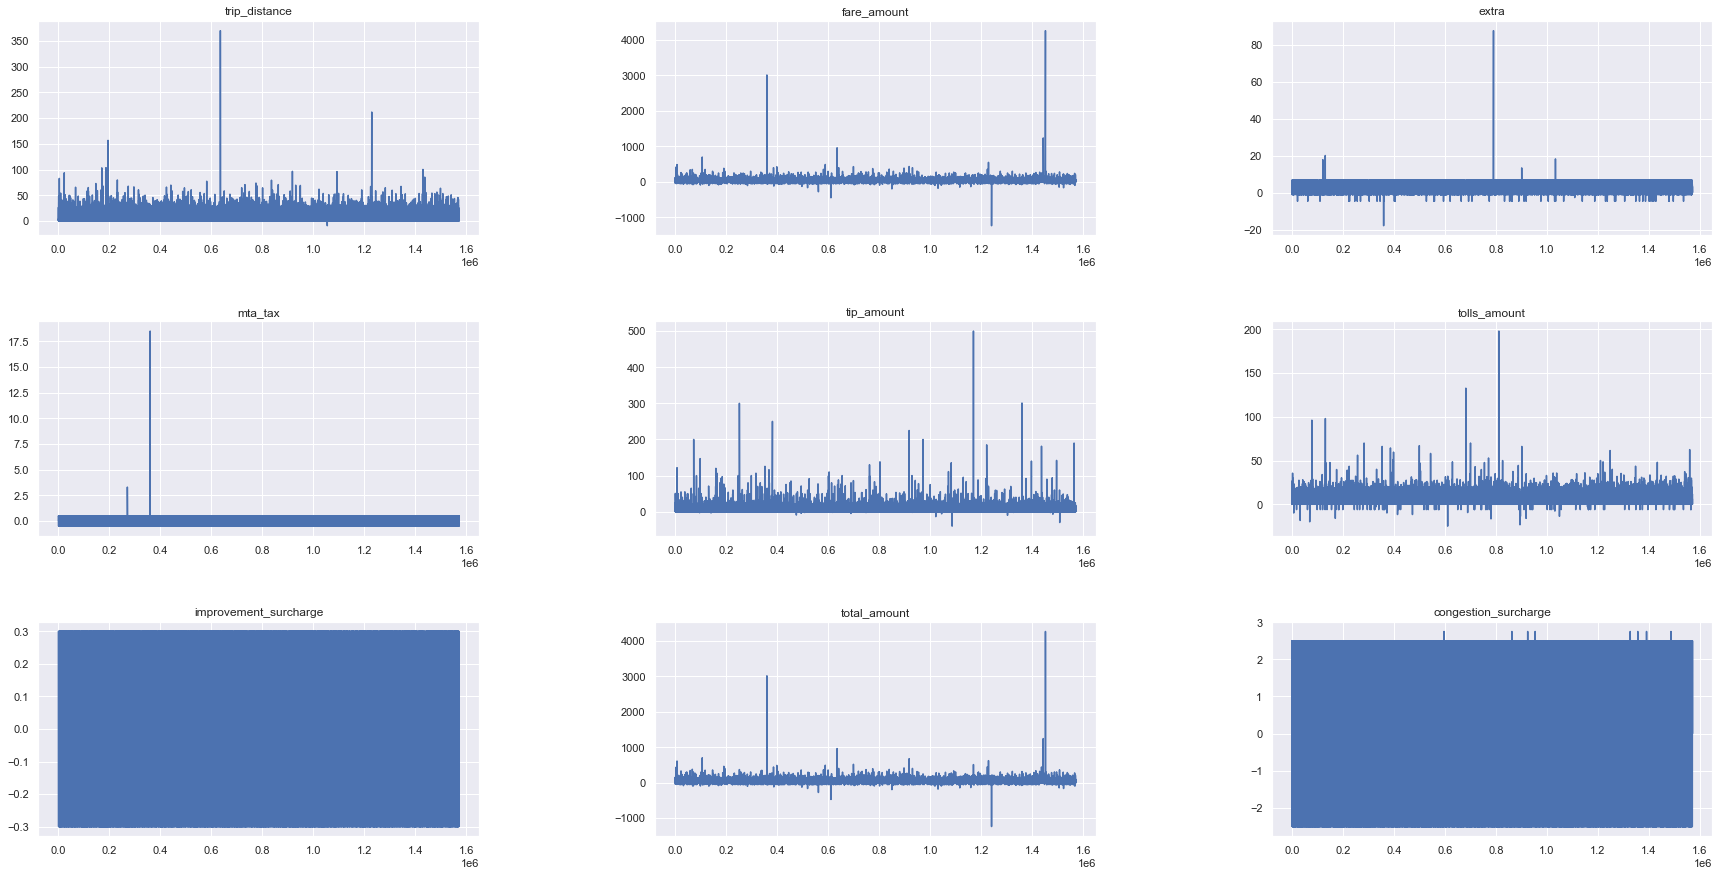

In [34]:
 #TODO: Agrego graficos para mostrar estos datos anomalos.
# Exploración gráfica de variables con datos negativos.

colArrays = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 
            'tip_amount', 'tolls_amount', 'improvement_surcharge', 
            'total_amount', 'congestion_surcharge']

plotVariables(df,colArrays)


In [35]:
# trip distance: borro <= 0
df = df[(df['trip_distance'] > 0)]
# fare_amount: borro < 0
df = df[(df['fare_amount'] >= 0)]
# extra: borro < 0
df = df[(df['extra'] >= 0)]
# mta_tax: borro < 0
df = df[(df['mta_tax'] >= 0)]
# tip_amount: borro < 0
df = df[(df['tip_amount'] >= 0)]
#tolls amount: borro < 0
df = df[(df['tolls_amount'] >= 0)]
#improvement_surcharge: borro < 0
df = df[(df['improvement_surcharge'] >= 0)]
#total_amount: borro < 0
df = df[(df['total_amount'] >= 0)]
#congestion_surcharge: borro < 0
df = df[(df['congestion_surcharge'] >= 0)]

len(df)



1535576

#### Exploración gráfica de datos filtrados


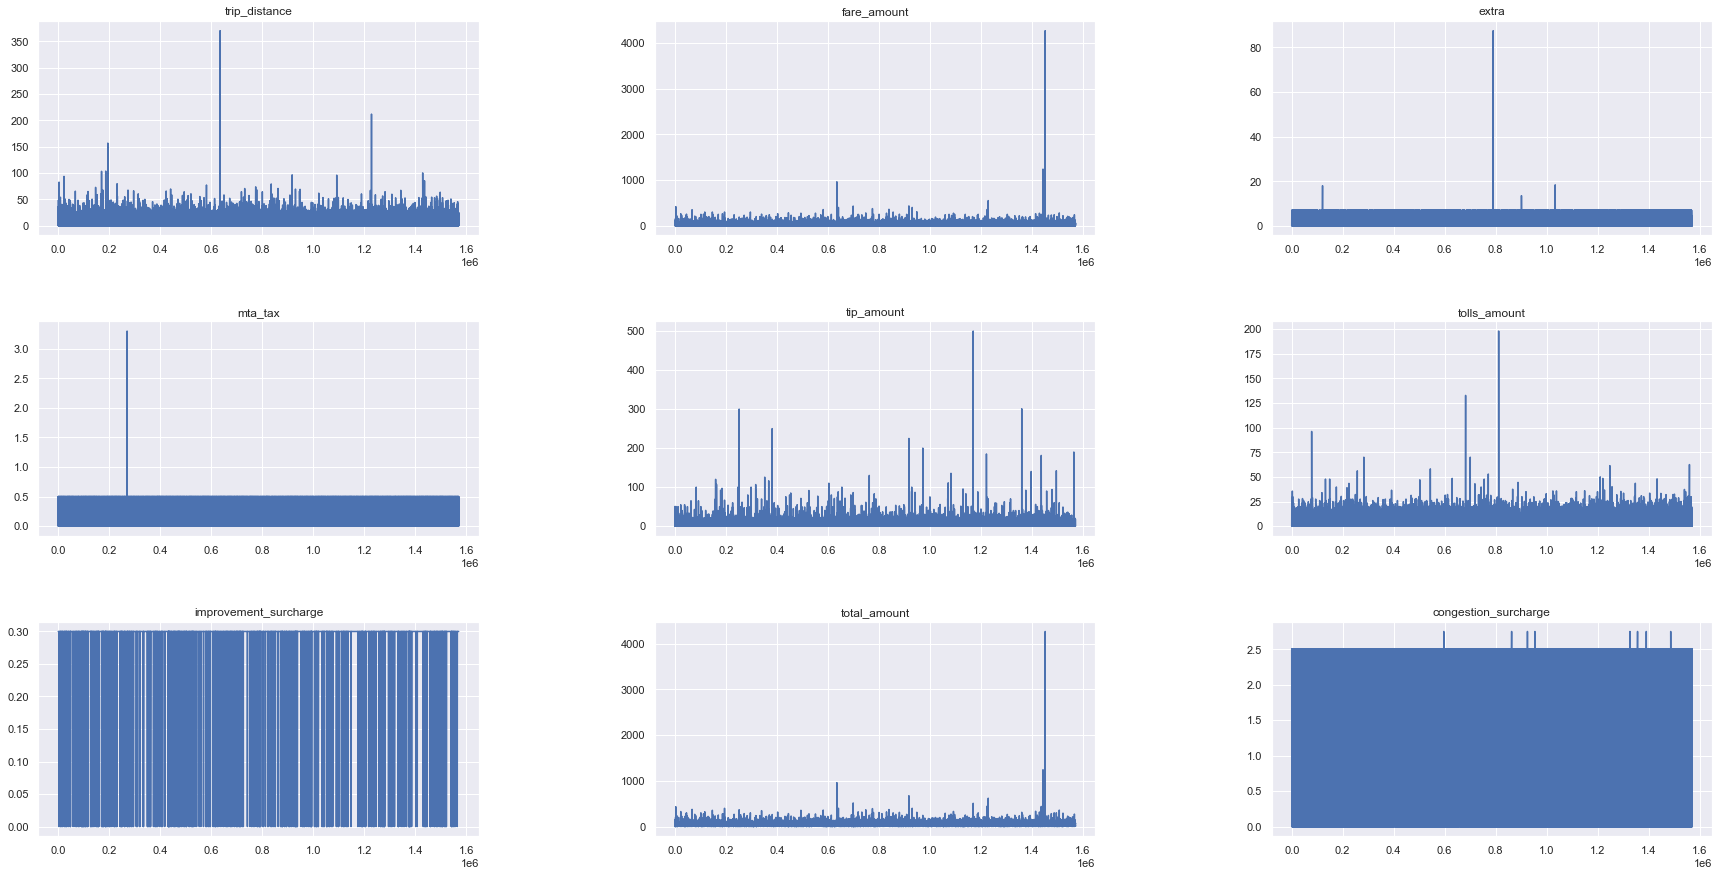

In [36]:
# Datos sin valores negativos
plotVariables(df,colArrays)

#### 2.1.3 Filtro entradas por tipo de pago
Descarto otros pagos diferenes de CREDIT (payment_type = 1)

In [37]:
df = df[df["payment_type"] == 1]
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000
mean,1.671,1.496,2.868,1.039,166.015,163.962,1.000,12.452,1.130,0.498,2.949,0.339,0.300,19.268,2.379
std,0.470,1.143,3.678,0.278,65.163,69.361,0.000,10.879,1.255,0.031,2.674,1.581,0.003,13.971,0.537
min,1.000,0.000,0.010,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,113.000,1.000,6.500,0.000,0.500,1.730,0.000,0.300,11.800,2.500
50%,2.000,1.000,1.650,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500
75%,2.000,2.000,2.910,1.000,234.000,234.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.350,2.500
max,2.000,9.000,211.700,6.000,265.000,265.000,1.000,550.000,18.350,3.300,500.000,198.000,0.300,674.310,2.750


### 2.2 Ingeniería de datos

#### 2.2.1 Features de tiempo y hora del día

In [38]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(df['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(df['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
df['duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 

day_interval = df['tpep_pickup_datetime'].dt.hour
df['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

(0, 0, 0)

In [39]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

In [40]:
# termino de borrar todos los negativos
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

# verifico si tengo entradas con duration < 0
duration_invalid = df[df['duration'] < 0]['duration'].count()
print(f'Duraciones inválidas: {duration_invalid}')

Duraciones inválidas: 0


In [41]:
# Se eliminan las duraciones invalidas
df = df[(df['duration'] >= 0)]

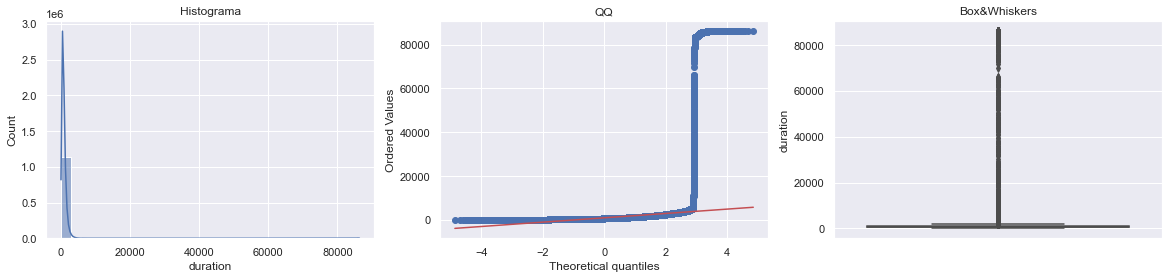

In [42]:
# Graficamos las nuevas columnas para observar su distribucion.
outlier_diagnostic_plots(df, 'duration')

#### Exploración gráfica de Morning, Afternoon, Evening

Text(0.5, 1.0, 'Evening')

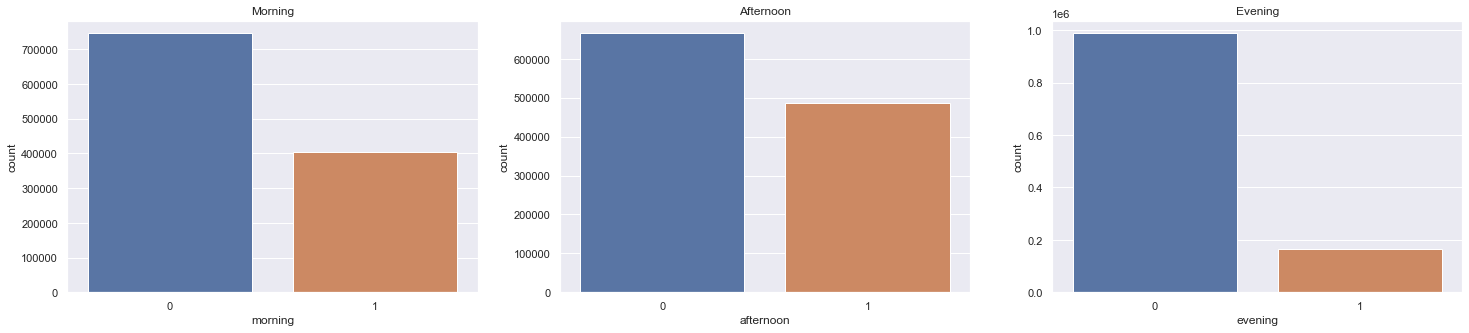

In [43]:
fig,axes = plt.subplots(1,3,figsize=(25,5))


sns.countplot(x='morning', data=df,ax=axes[0])
axes[0].set_title('Morning')

sns.countplot(x='afternoon', data=df,ax=axes[1])
axes[1].set_title('Afternoon')

sns.countplot(x='evening', data=df,ax=axes[2])
axes[2].set_title('Evening')


#### 2.2.2 Codificación del origen y destino

[(237, 52520), (161, 51734), (236, 50901), (162, 44930), (186, 39500), (230, 38671), (234, 37360), (170, 37250), (142, 35612), (48, 32952)]
[(0, 729771), (237, 52520), (161, 51734), (236, 50901), (162, 44930), (186, 39500), (230, 38671), (234, 37360), (170, 37250), (142, 35612), (48, 32952)]


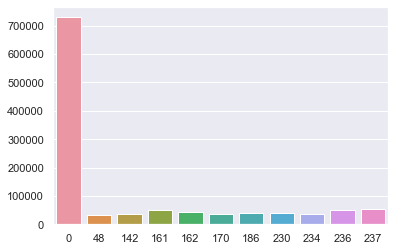

In [44]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
# location_id_min_th_count = 0.01
# total_items = len(df['PULocationID'])

# # convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
# pulocation_id_freq_map = (df['PULocationID'].value_counts(sort=True) / total_items).to_dict()
# df['PULocationIDFreq'] = df['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# # # convertimos DOLocationID
# # dolocation_id_freq_map = (df['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
# # df['DOLocationIDFreq'] = df['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

# #pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
# def clear_location_low_values(x, th):
#   if x <= th:
#     return 0
#   return x

# df['PULocationIDFreq'] = df['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# # df['DOLocationIDFreq'] = df['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# Contamos las apariciones de los lugares mas concurridos
from turtle import color


mostPickUpSites = Counter(df['PULocationID'])

# Mostramos los 10 primeros.
print(mostPickUpSites.most_common(10))

aux = mostPickUpSites.most_common(10)
most_pickup_important_places = []
for i in aux:
    most_pickup_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['PULocationID'] = np.where(df['PULocationID'].isin(most_pickup_important_places), df['PULocationID'], 0)

type_feature = df['PULocationID'].value_counts()

sns.barplot(x=type_feature.index, y=type_feature.values, data=df['PULocationID'])
commonPickUpSites = Counter(df['PULocationID'])
# Mostramos los 10 primeros.
print(commonPickUpSites.most_common(20))


#### 2.2.3 Balance de la variable de salida

In [45]:
#verifico el rango de los ids
df['DOLocationID'].min(), df['DOLocationID'].max()


(1, 265)

In [46]:
#asigno a la categoria 0 a todos los que aparecen por debajo del 1%
# location_id_min_th_count = 0.01 * len(df)
# df['DOLocationIDTruncated'] = df['DOLocationID'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# df['DOLocationIDTruncated'].values[:10], location_id_min_th_count


[(236, 54376), (237, 47446), (161, 44520), (170, 37360), (162, 35127), (234, 32960), (142, 32591), (239, 32238), (141, 31756), (230, 30582)]
[(0, 772245), (236, 54376), (237, 47446), (161, 44520), (170, 37360), (162, 35127), (234, 32960), (142, 32591), (239, 32238), (141, 31756), (230, 30582)]


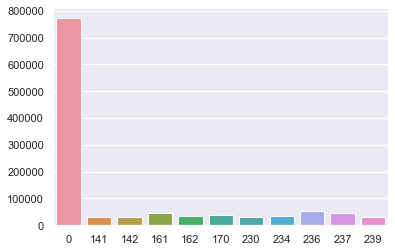

In [47]:


# Contamos las apariciones de los lugares mas concurridos
mostCommonSites = Counter(df['DOLocationID'])

# Mostramos los 10 primeros.
print(mostCommonSites.most_common(10))

aux = mostCommonSites.most_common(10)
most_important_places = []
for i in aux:
    most_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['DOLocationID'] = np.where(df['DOLocationID'].isin(most_important_places), df['DOLocationID'], 0)

type_feature = df['DOLocationID'].value_counts()

sns.barplot(x=type_feature.index, y=type_feature.values, data=df['DOLocationID'])
commonSites = Counter(df['DOLocationID'])
# Mostramos los 10 primeros.
print(commonSites.most_common(20))

In [48]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
count,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000
mean,1.671,1.496,2.868,1.039,67.775,65.014,1.000,12.452,1.130,0.498,2.949,0.339,0.300,19.268,2.379,943.320
std,0.470,1.143,3.678,0.278,94.799,95.666,0.000,10.879,1.255,0.031,2.674,1.581,0.003,13.971,0.537,3492.428
min,1.000,0.000,0.010,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,0.000,0.000,1.000,6.500,0.000,0.500,1.730,0.000,0.300,11.800,2.500,400.000
50%,2.000,1.000,1.650,1.000,0.000,0.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500,645.000
75%,2.000,2.000,2.910,1.000,162.000,161.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.350,2.500,1023.000
max,2.000,9.000,211.700,6.000,237.000,239.000,1.000,550.000,18.350,3.300,500.000,198.000,0.300,674.310,2.750,86376.000


### 2.3 Selección final de las features

En base al procesamiento anterior, seleccionamos los siguientes features del dataset:

In [49]:

feature_cols = [
  'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
  'mta_tax', 'tip_amount', 'tolls_amount', 
  'improvement_surcharge', 'total_amount', 
  'congestion_surcharge', 'duration', 'PULocationID',
  'morning', 'afternoon', 'evening']
target_col = ['DOLocationID']

X = df[feature_cols]
y = df[target_col]

#### Eliminacion de datos con baja varianza

In [50]:
# TODO
from statistics import variance
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X)
print(X.shape)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X.columns
                    if column not in X.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)
    
variance_X = X.drop(constant_columns,axis=1)
variance_X.shape

(1151201, 15)
(1151201, 13)
2
mta_tax
improvement_surcharge


(1151201, 13)

In [51]:
variance_X.describe()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,PULocationID
count,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000,1151201.000
mean,1.496,2.868,12.452,1.130,2.949,0.339,19.268,2.379,943.320,67.775
std,1.143,3.678,10.879,1.255,2.674,1.581,13.971,0.537,3492.428,94.799
min,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,6.500,0.000,1.730,0.000,11.800,2.500,400.000,0.000
50%,1.000,1.650,9.000,0.500,2.320,0.000,14.800,2.500,645.000,0.000
75%,2.000,2.910,13.500,2.500,3.260,0.000,20.350,2.500,1023.000,162.000
max,9.000,211.700,550.000,18.350,500.000,198.000,674.310,2.750,86376.000,237.000


In [52]:
y.shape

(1151201, 1)

## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [ ]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)


In [ ]:
#imprimo tamaños de los dataset de train y test
print(f'train len={len(X_train)}')
print(f'test len={len(X_test)}')

### 3.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
total_trees = 100 # number of trees
max_depth = 2

rf = RandomForestClassifier(n_estimators = total_trees, max_depth = max_depth, random_state=0)

In [ ]:
rf.fit(X_train, y_train.values.reshape(-1))


In [ ]:

# Utilizamos el método de predicción en los datos de prueba
y_rf_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_rf_pred))
print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_rf_pred),4))
# rf_precision, rf_recall, rf_threshold=precision_recall_curve(y_test, y_rf_pred)
# print('Area bajo la curva Precision-Recall:',np.round(auc(rf_recall,rf_precision),4))
# plot_confusion_matrix(rf, X_test, y_test,cmap='Blues')

### 3.3 Regresión logística

In [ ]:
def logistic_regression_report(X_train,X_test,y_train,y_test):
    
    scaler=StandardScaler()  
    
    X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
    X_test_sc=scaler.transform(X_test)
        
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)
    
    print(classification_report(y_test,y_pred))    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))    
    precision, recall,threshold=precision_recall_curve(y_test,y_proba[:,1])
    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))
    print(f'Precision:{precision}, Recall: {recall}:')
    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues')

In [ ]:
#logistic_regression_report(X_train, X_test, y_train, y_test)
scaler = StandardScaler()  
X_train_sc = scaler.fit_transform(X_train) # Estandarizamos los datos     
X_test_sc = scaler.transform(X_test)

lr = LogisticRegression(random_state = 1)
lr.fit(X_train_sc,y_train)
y_lr_pred = lr.predict(X_test_sc)
lr_precision, lr_recall, lr_threshold=precision_recall_curve(y_test,y_lr_pred)

lr_precision, lr_recall, lr_threshold

In [ ]:
lr_precision

# TODO - Falta terminar

1. Aplicar filtrado Kendall para analizar las variables de entrada con respecto a la de salida
2. Analizar variables con poca varianza
3. Quedarse con las 10 Locations mas importantes de Pick Up y Drop Off y todas las otras meterlas en un id 0 (others)
4. Correr Random Forest y Linear regression. Obtener los feature importance.
5. Ejecutar pyCaret para ver en que concluye el automl